In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

df = pd.read_csv("./train.csv")

# Desde Google Colab, montar desde Google Drive
# from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [2]:
# --- Selección de variables numéricas & resumen ---
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", numeric_cols)
print("Categóricas:", categorical_cols)

df[numeric_cols].describe().T.round(3)

Numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000,257.354,1.00,223.500,446.000,668.5,891.000
Survived,891.0,0.384,0.487,0.00,0.000,0.000,1.0,1.000
Pclass,891.0,2.309,0.836,1.00,2.000,3.000,3.0,3.000
Age,714.0,29.699,14.526,0.42,20.125,28.000,38.0,80.000
SibSp,891.0,0.523,1.103,0.00,0.000,0.000,1.0,8.000
Parch,891.0,0.382,0.806,0.00,0.000,0.000,0.0,6.000
Fare,891.0,32.204,49.693,0.00,7.910,14.454,31.0,512.329


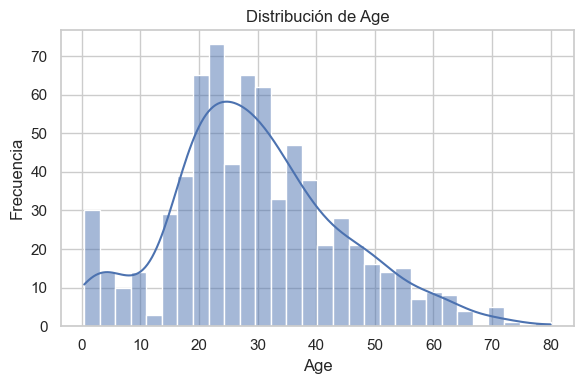

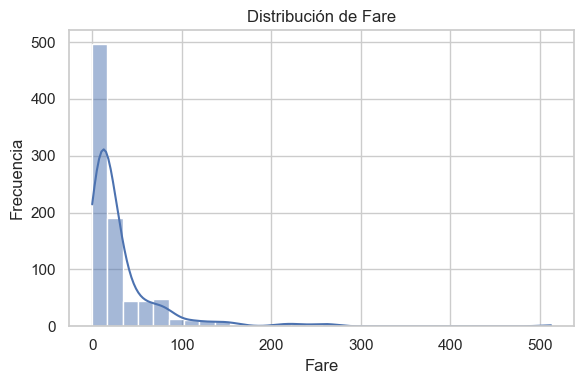

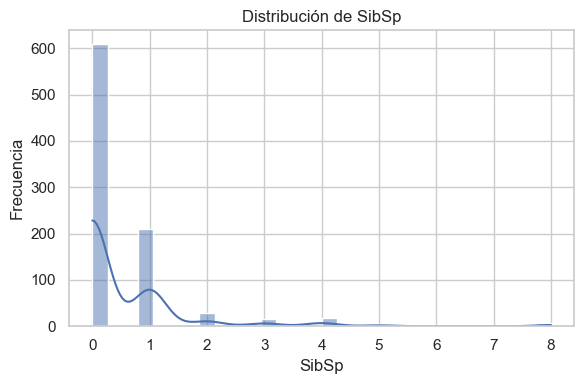

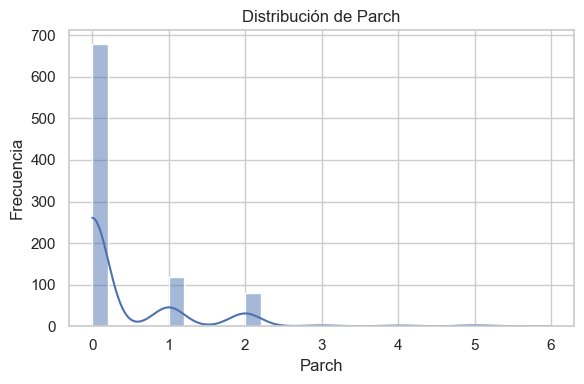

In [3]:
# --- Configuración de estilo de gráficos --- 
sns.set(context="notebook", style="whitegrid")

# --- Distribuciones: histograma ---
cols_to_plot = [c for c in ["Age", "Fare", "SibSp", "Parch"] if c in df.columns]
for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col); plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


Mesocúrtica (curtosis ≈ 0)
Forma similar a la distribución normal.
Colas normales, sin extremos exagerados.

Leptocúrtica (curtosis > 0)
Distribución más “picuda”, con colas más pesadas.
Indica mayor presencia de valores extremos/outliers.

Platicúrtica (curtosis < 0)
Distribución más “aplanada”.
Colas ligeras, los datos están más dispersos.

|skew| < 0.5  aproximadamente simétrica.
0.5 ≤ |skew| < 1  sesgo moderado.
|skew| ≥ 1  sesgo fuerte → conviene transformar.

In [4]:
# --- Skewness y kurtosis ---
stats_rows = []
for col in cols_to_plot:
    s = df[col].dropna()
    stats_rows.append({
        "variable": col,
        "count": s.count(),
        "mean": s.mean(),
        "std": s.std(),
        "skew": skew(s),          
        "kurtosis": kurtosis(s)
    })
dist_stats = pd.DataFrame(stats_rows).round(3).sort_values("skew", ascending=False)
dist_stats


,variable,count,mean,std,skew,kurtosis
1,Fare,891,32.204,49.693,4.779,33.204
2,SibSp,891,0.523,1.103,3.689,17.774
3,Parch,891,0.382,0.806,2.744,9.717
0,Age,714,29.699,14.526,0.388,0.169
